# Introduction to FraGVAE

This mini tutorial will demonstrate how to generate, train, load and autoencoded of a molecule graph.

Here we start with loading fragvave package and generating a new FraGVAE object which automatically generate a new epxiermental directory (here #5) in the model directory.

In [1]:
import fragvae as fg
%pwd

fragvae_obj_untrained = fg.FraGVAE(5,train_dataset='Zinc15filtered',CV_dataset='PubChemfiltered')


Overwite file models/experiment000005/exp.json


To train an autoencoder to decompose and reconstruct the molecule to a bag of circular fragments center on atom with radius of 1 (fragments radius 1 --> f1). Please use the following code. 


In [2]:
fragvae_obj_untrained.load_models(rnd=True,testing = False)
fragvae_obj_untrained.train_f1_models()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Generating atom index 59 with degree 3                                                                                    
Training first order fragment VAE (F1, Zf)
Model name : 
Experiment number : 5
Instructions for updating:
Use tf.cast instead.
Current kl_loss_var annealer weight is 9.110511944006455e-07
10/10 [==============================] - 80s 8s/step - loss: 1779.4165

Epoch 00001: val_loss improved from inf to 1779.41648, saving model to models/experiment000005/Training_model_best_CV.h5
10/10 [==============================] - 315s 32s/step - loss: 1982.1347 - val_loss: 1779.4165
Overwite file models/experiment000005/exp.json
Current kl_loss_var annealer weight is 2.4726231566347745e-06
Epoch 2/2
10/10 [==============================] - 3s 300ms/step - loss: 1614.8507

Epoch 00002: val_loss

As training consucmes a lot of memory due to the generation of a new larger training model that trains the decoders and encodes. It is best pratice to restart the kernel, load in the models and train the other branch of the autoencoder. 

Next we train the fragment connectivity model using higher order fragment information (fragHigherOrder --> fho) HO model. The default paramaters FHO_batch_size and FHO_attempts_per_batch were set to small values not to crash a typical laptop. 
FHO_batch_size - is the number of fragment set comparisions in a training epoch batch
FHO_attempts_per_batch - is the number of fragment comparisions in a training epoch batch set

In [1]:
import fragvae as fg
%pwd
fragvae_obj_untrained = fg.FraGVAE(5)

fragvae_obj_untrained.load_models(rnd=False,testing = False)


fragvae_obj_untrained.train_fho_models()

Overwite file models/experiment000005/exp.json
FHO encoder model is not saved, generating random model
Encoder Model Generation: Adding NeuralGraphHidden F2                                                             WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
Encoder Model Generation: Complete :D                                                                                     WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\core.py:143: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Generating F1_

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Current kl_loss_var annealer weight is 3.0590222692562475e-10
10/10 [==============================] - 52s 5s/step - loss: 13231.6321

Epoch 00001: val_loss improved from inf to 13231.63213, saving model to models/experiment000005/Training_model_best_CV.h5
10/10 [==============================] - 291s 29s/step - loss: 13275.2516 - val_loss: 13231.6321
Overwite file models/experiment000005/exp.json
Current kl_loss_var annealer weight is 8.315280276641321e-10
Epoch 2/2
10/10 [==============================] - 10s 1s/step - loss: 13152.8179

Epoch 00002: val_loss improved from 13231.63213 to 13152.81787, saving model to models/experiment000005/Training_model_best_CV.h5
10/10 [==============================] - 25s 3s/step - loss: 13196.2328 - val_loss: 13152.8179
Overwite file models/experiment000005/exp.json




Next we create a new FraGVAE object with pre-trained values reloaded from experiment 1. This model was trained on Zinc15 set with large dimensions. 

In [1]:
import fragvae as fg
#setting up object and loading parameters files
fragvae_obj_trained = fg.FraGVAE(1)

#building and loading tensorflow models
fragvae_obj_trained.load_models(rnd = False, testing = True)

Overwite file models/experiment000001/exp.json
Encoder Model Generation: Adding NeuralGraphHidden F2                                                             WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\resource_variable_ops.py:435: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
Encoder Model Generation: Complete :D                                                                                     WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\core.py:143: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
FHO Decoder Model Generation: Complete                                

Here we use test the model by autoenecoding an example. (Ibuprofen). To create a GIF of the process, set display_process = True. Use fg.display_funs.gif_rebuild() to convert img files in FraGVAE\imgs_gifs\imgs_to_gif folder to a anmimation. Please note display_process = True. Defualt is False as the process is slow. 

Ibuprofen molecule


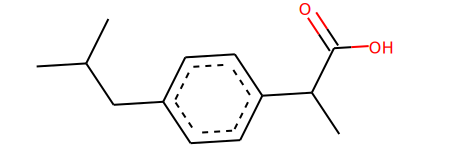

FHO Decode: Adding Frag, Total Atoms: 13 Total Bonds: 14                                                              
Autoencoded Ibuprofen


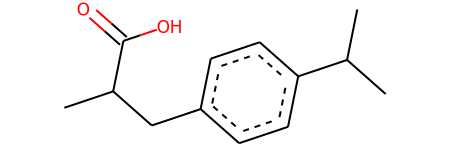

In [2]:
# Ibuprofen SMILE
smile  = 'CC(C)Cc1ccc(cc1)[C@@H](C)C(=O)O'
mol = fg.convert_mol_smile_tensor.smile_to_mol(smile, fragvae_obj_trained.params)
img,svg = fg.display_funs.gen_img_svg_mol(mol)
print('Ibuprofen molecule')
display(img)

mol_auto = fragvae_obj_trained.autoencode_mol(mol, display_process = False)    
    
mol_auto_img,svg = fg.display_funs.gen_img_svg_mol(mol_auto)
print('')
print('Autoencoded Ibuprofen')
display(mol_auto_img)